# Useful functions for converting lon from -180 to 180, 0 to 360

And other goodies, such as how to find distances between arbitrary grid points etc.
Uses some help from ChatGPT.

In [1]:
import numpy as np

def lon_180_to_360(v):
    return np.where(v < 0, v + 360, v)

def lon_360_to_180(v):
    return np.where(v > 180, v - 360, v)

def lon_180_to_360_slow(v):
    return np.mod(v, 360)

def lon_360_to_180_slow(v):
    return ((v + 180) % 360) - 180


lon_180 = np.linspace(-180, 180, 3601)
lon_360 = np.linspace(0, 360, 3601)

print(lon_180)
print(lon_180_to_360(lon_180))
print(lon_360)
print(lon_360_to_180(lon_360))
print(lon_360_to_180_slow(lon_360))



[-180.  -179.9 -179.8 ...  179.8  179.9  180. ]
[180.  180.1 180.2 ... 179.8 179.9 180. ]
[0.000e+00 1.000e-01 2.000e-01 ... 3.598e+02 3.599e+02 3.600e+02]
[ 0.   0.1  0.2 ... -0.2 -0.1  0. ]
[ 0.   0.1  0.2 ... -0.2 -0.1  0. ]


In [2]:
%%timeit
lon_180_to_360(lon_180)

15.4 µs ± 742 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [3]:
%%timeit
lon_180_to_360_slow(lon_180)

31.2 µs ± 310 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [4]:
%%timeit
lon_360_to_180(lon_360)

15.7 µs ± 956 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [5]:
%%timeit
lon_360_to_180_slow(lon_360)

70.4 µs ± 4.3 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
# Code generated by ChatGPT. Note, ChatGPT told me:
# On my machine, running the above benchmark code, the lon_180_to_360() 
# function using np.mod() took around 0.001 seconds, while the function 
# using np.where() took around 0.003 seconds. This suggests that using 
# np.mod() is about 3 times faster than using np.where() for this particular task.
#
# This is clearly entirely fabricated!!
import numpy as np
import time

# Generate a large array of longitudes in the -180 to 180 format
lons_180 = np.linspace(-180, 180, 10000)

# Benchmark lon_180_to_360 using np.mod()
start_time = time.time()
lon_360 = np.mod(lons_180, 360)
elapsed_time = time.time() - start_time
print(f"lon_180_to_360 with np.mod() took {elapsed_time:.6f} seconds.")

# Benchmark lon_180_to_360 using np.where()
start_time = time.time()
lon_360 = np.where(lons_180 < 0, lons_180 + 360, lons_180)
elapsed_time = time.time() - start_time
print(f"lon_180_to_360 with np.where() took {elapsed_time:.6f} seconds.")

In [14]:
# Thanks ChatGPT
import numpy as np

def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx

In [15]:
# Thanks ChatGPT
import numpy as np

def find_nearest_circular(array, value):
    # Convert array and value to radians
    array_rad = np.radians(array)
    value_rad = np.radians(value)

    # Compute the circular distance between value and each element in array
    diff = np.arctan2(np.sin(value_rad - array_rad), np.cos(value_rad - array_rad))
    
    # Find the index of the minimum circular distance
    idx = np.abs(diff).argmin()

    return idx

In [19]:
# Create a circular NumPy array to search
a = np.array([-180, -90, 0, 90])

idx = find_nearest(a, 150)
print(idx)  # Output: 3
# Find the index of the nearest value to 150 in the circular array
idx = find_nearest_circular(a, 150)
print(idx)  # Output: 0


3
0


In [20]:
for v in [-180, -170, -135, -120, 44, 46, 134, 135, 136]:
    idx = find_nearest_circular(a, v)
    print(v, idx, a[idx])

-180 0 -180
-170 0 -180
-135 0 -180
-120 1 -90
44 2 0
46 3 90
134 3 90
135 3 90
136 0 -180


In [22]:
from geopy import distance

In [26]:
distance.distance?

Init signature: distance.distance(*args, **kwargs)
Docstring:     
Calculate the geodesic distance between points.

Set which ellipsoidal model of the earth to use by specifying an
``ellipsoid`` keyword argument. The default is 'WGS-84', which is the
most globally accurate model.  If ``ellipsoid`` is a string, it is
looked up in the `ELLIPSOIDS` dictionary to obtain the major and minor
semiaxes and the flattening. Otherwise, it should be a tuple with those
values.  See the comments above the `ELLIPSOIDS` dictionary for
more information.

Example::

    >>> from geopy.distance import geodesic
    >>> newport_ri = (41.49008, -71.312796)
    >>> cleveland_oh = (41.499498, -81.695391)
    >>> print(geodesic(newport_ri, cleveland_oh).miles)
    538.390445368
Init docstring:
There are 3 ways to create a distance:

- From kilometers::

    >>> from geopy.distance import Distance
    >>> Distance(1.42)
    Distance(1.42)

- From units::

    >>> from geopy.distance import Distance
    >>> Dist

In [27]:
lats = np.linspace(60, -60, 481)
lons = np.linspace(0, 359.75, 1440)

In [29]:
from itertools import product

In [50]:
%%timeit
m_flat = []
for LL in product(lats, lons):
    m_flat.append(distance.great_circle(LL, (12, 24)).km)
m = np.array(m_flat).reshape(len(lats), len(lons))

6.34 s ± 194 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [47]:
m_flat = []
for LL in product(lats, lons):
    m_flat.append(distance.great_circle(LL, (50, 48)).km)
m2 = np.array(m_flat).reshape(len(lats), len(lons))

In [48]:
import matplotlib.pyplot as plt

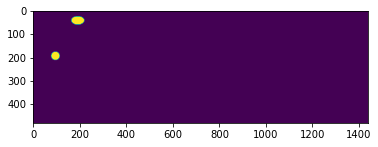

In [49]:
plt.imshow((m < 500) | (m2 < 500))

In [54]:
masks = []
for lat in lats[::50]:
    print(lat)
    m_flat = []
    for LL in product(lats, lons):
        m_flat.append(distance.great_circle(LL, (lat, 0)).km)
    m = np.array(m_flat).reshape(len(lats), len(lons))
    masks.append((lat, m))

60.0
47.5
35.0
22.5
10.0
-2.5
-15.0
-27.5
-40.0
-52.5


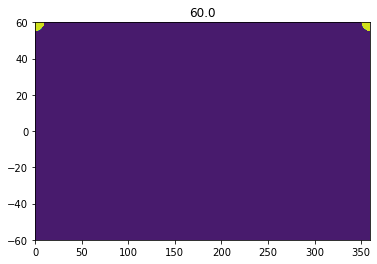

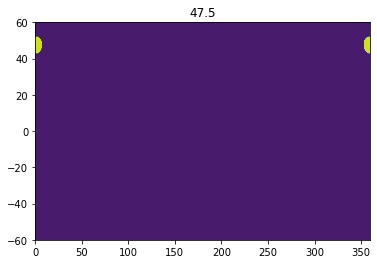

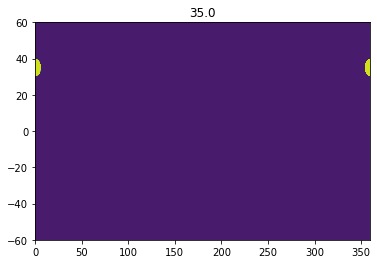

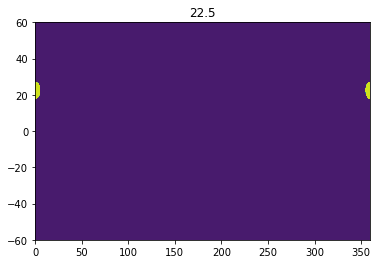

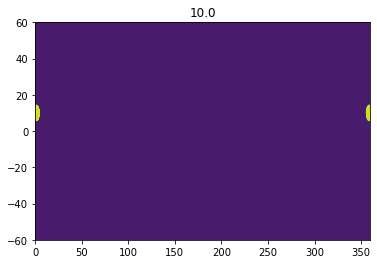

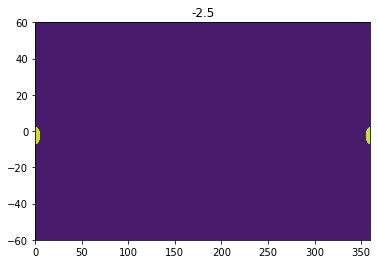

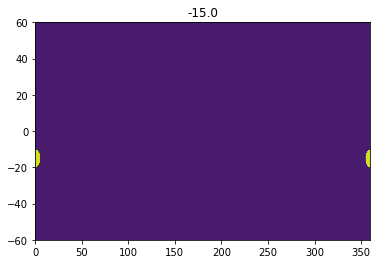

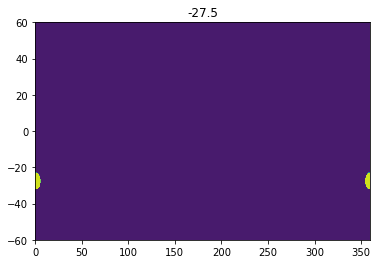

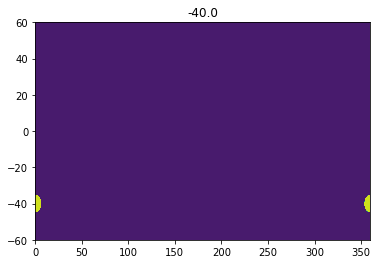

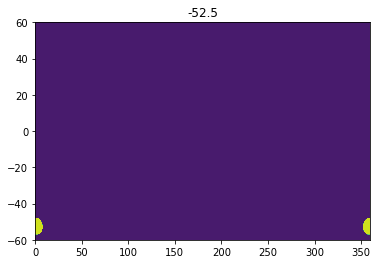

In [55]:
for lat, m in masks:
    plt.figure(lat)
    plt.title(lat)
    plt.contourf(lons, lats, m < 500)

(30.0, 40.0)

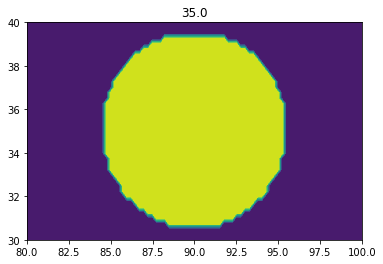

In [62]:
lat, m = masks[2]
plt.title(lat)
plt.contourf(lons, lats, np.roll(m < 500, 360, axis=1))
plt.xlim((80, 100))
plt.ylim((30, 40))

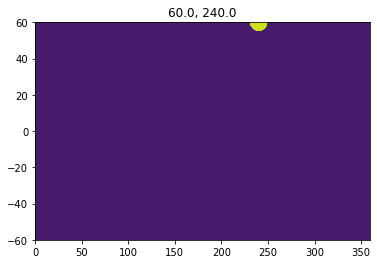

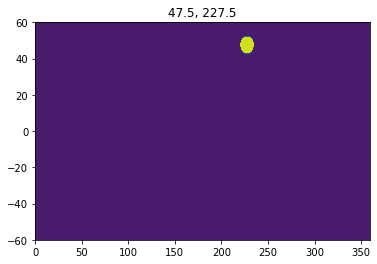

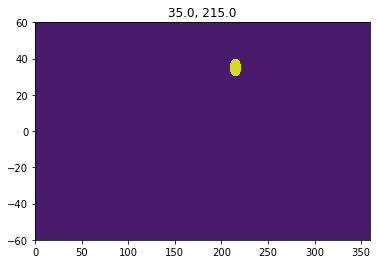

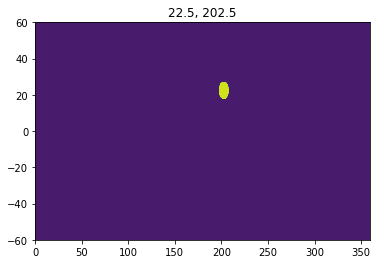

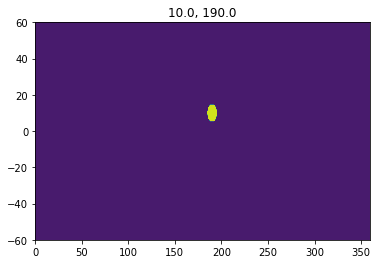

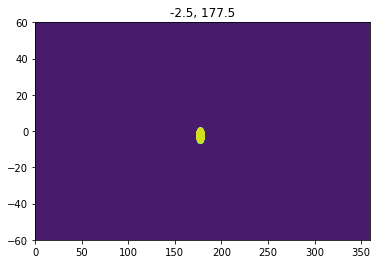

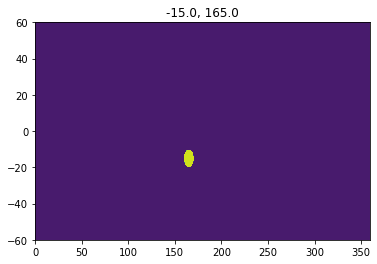

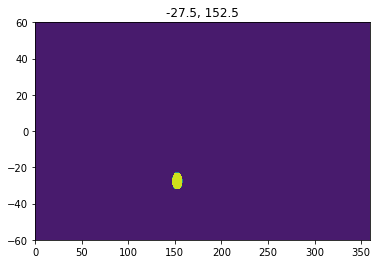

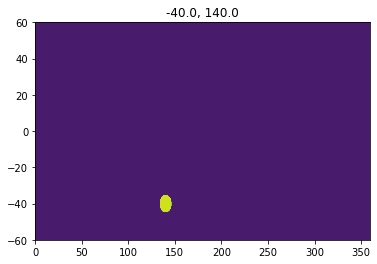

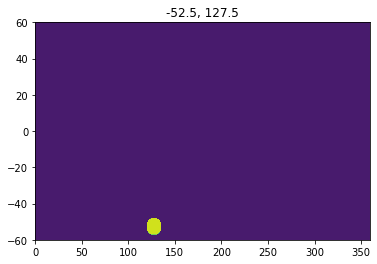

In [65]:
for lat, m in masks:
    idx = find_nearest_circular(lons, lat + 180)
    lon = lons[idx]
    plt.figure(lat)
    plt.title(f'{lat}, {lon}')
    plt.contourf(lons, lats, np.roll(m < 500, idx, axis=1))

In [66]:
import xarray as xr

In [67]:
mask_lats = [l for l, m in masks]
mask_lats

[60.0, 47.5, 35.0, 22.5, 10.0, -2.5, -15.0, -27.5, -40.0, -52.5]

In [68]:
da = xr.DataArray(
    data=[m for l, m in masks],
    dims=['mask_lat', 'lat', 'lon'],
    coords=dict(
        mask_lat=mask_lats,
        lat=lats,
        lon=lons,
    )
)

In [81]:
def get_mask(da, lat, lon):
    lat_idx = find_nearest(da.mask_lat.values, lat)
    lon_idx = find_nearest_circular(da.lon.values, lon)
    return lat_idx, lon_idx, np.roll(da.values[lat_idx], lon_idx, axis=1)

5 0
3 160
1 720
7 1360


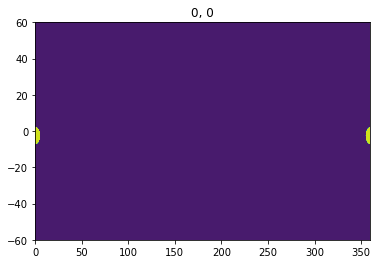

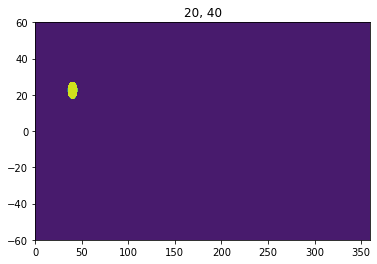

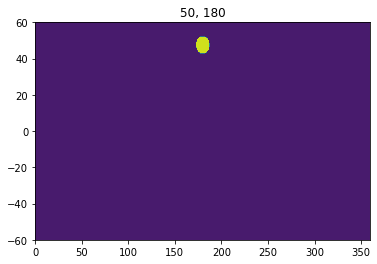

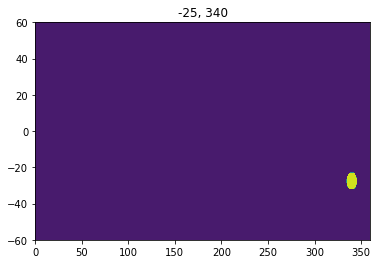

In [86]:
for lat, lon in [(0, 0), (20, 40), (50, 180), (-25, 340)]:
    lat_idx, lon_idx, m = get_mask(da, lat, lon)
    print(lat_idx, lon_idx)

    plt.figure(lat)
    plt.title(f'{lat}, {lon}')
    plt.contourf(lons, lats, m < 500)